In [33]:
 pip install yellowbrick

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
airlines = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [4]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airlines.shape

(3999, 12)

In [6]:
airlines=airlines.iloc[:,1:]

In [7]:
airlines.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
dataset= airlines.rename(columns={'ID#':'ID', 'Award?':'Award'})
dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
dataset1 = dataset.drop(['Award'], axis=1)

In [21]:
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [23]:
std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

In [24]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

In [25]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [26]:
print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [27]:
print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [28]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [29]:
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [30]:
print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [31]:
print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


model1


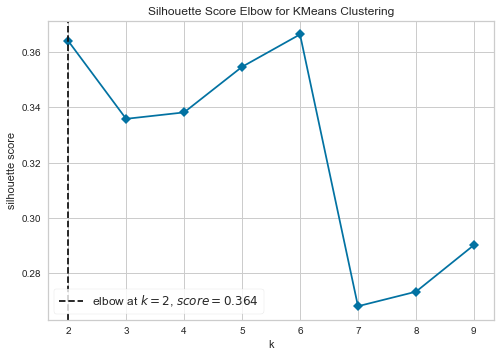

model2


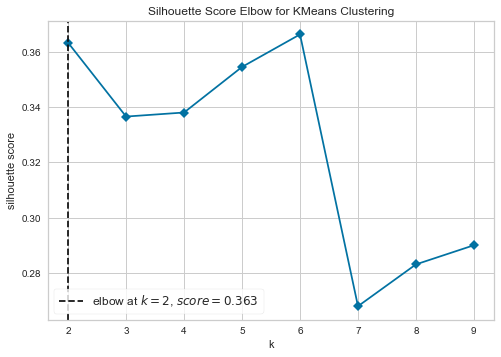

In [42]:
model1 = KMeans(random_state=0,)
model2 = KMeans(random_state=10, max_iter=500, n_init=20,)
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

In [45]:
list1= [2,3,4,5,6,7,8,9]  

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.33580068936862706
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.3545751298691851
For n_clusters = 6 The average silhouette_score is : 0.3662869252330997
For n_clusters = 7 The average silhouette_score is : 0.26812534351796585
For n_clusters = 8 The average silhouette_score is : 0.27336588002771184
For n_clusters = 9 The average silhouette_score is : 0.2902078038474836


In [46]:
model3 = KMeans(random_state=0,)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

In [47]:
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)

model3


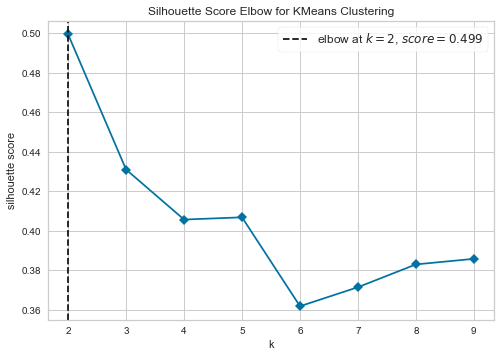

model4


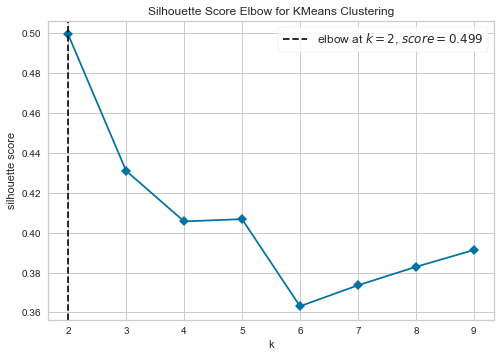

In [48]:
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

In [49]:
list1= [2,3,4,5,6,7,8,9] 

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.15898102441788234
For n_clusters = 3 The average silhouette_score is : 0.15898102441788234
For n_clusters = 4 The average silhouette_score is : 0.15898102441788234
For n_clusters = 5 The average silhouette_score is : 0.15898102441788234
For n_clusters = 6 The average silhouette_score is : 0.15898102441788234
For n_clusters = 7 The average silhouette_score is : 0.15898102441788234
For n_clusters = 8 The average silhouette_score is : 0.15898102441788234
For n_clusters = 9 The average silhouette_score is : 0.15898102441788234


In [51]:
model1 = KMeans(n_clusters=6, random_state=0,)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [52]:
y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
model1.cluster_centers_

array([[ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [-1.04312258e+00,  2.60937871e-01, -1.57354688e-02,
        -8.62930270e-02, -5.29463412e-02,  1.40872802e-01,
         5.55074837e-02,  9.04844177e-04],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 1.39804051e+00, -1.00275351e+00, -7.94776789e-02,
         9.64914049e-02, -2.55443434e-01, -2.46040607e-01,
        -6.93666285e-02, -2.00121569e-02],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01]])

In [55]:
model1.inertia_

16718.170043374106

In [56]:
model1.score(pca_std_df) 

-16718.170043374106

In [57]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

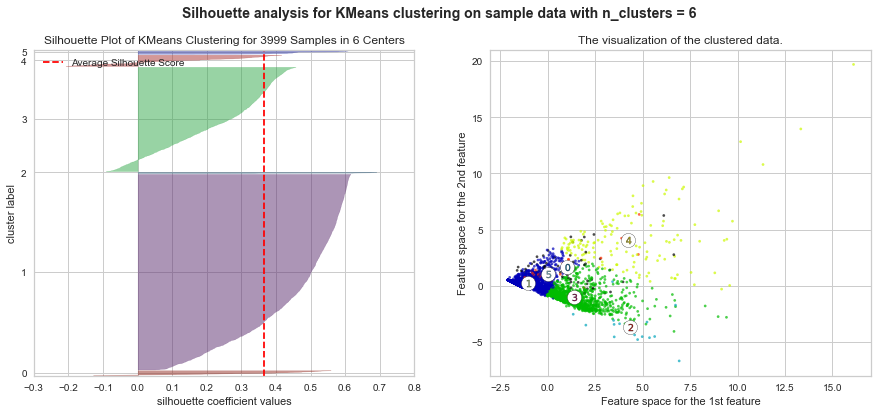

In [62]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)
sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)

colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [63]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [64]:
Kmeans_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [67]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.31396055949505675
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017467

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846737
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168968

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3282481973781312
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011895
For 

In [68]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4526351664478744
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.585780896047594
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034864
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453646

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654645
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542833655116025
For n_clusters = 3 The average silhouette_score with linkage- average : 0.45064261018788887
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064077

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3654778699731554
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.45615471007123654
For n_clusters = 4 The average silhouette_score with linkage- average : 0.39465688584567526
For

In [69]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
agg_clustering.n_clusters_

5

In [71]:
agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
agg_clustering.n_leaves_

3999

In [73]:
agg_clustering.n_connected_components_

1

In [74]:
agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [75]:
(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

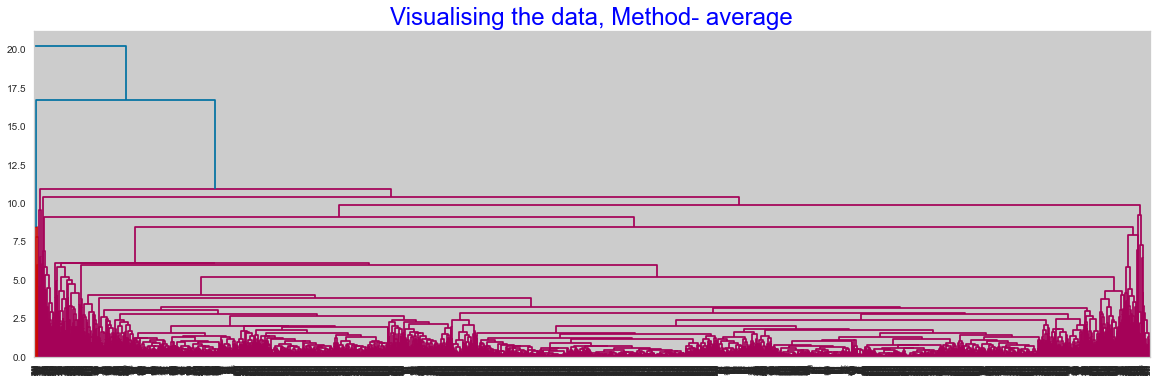

In [77]:
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [78]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [79]:
hie_df = pd.concat([dataset.copy(), hie_cluster], axis=1)
hie_df .head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [81]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59
1,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
2,15,15,15,15,15,15,15,15,15,15,15
3,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
4,141,141,141,141,141,141,141,141,141,141,141
5,43,43,43,43,43,43,43,43,43,43,43


In [82]:
hie_df.groupby(['Hie_Clustering']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,
0,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965
1,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,5


In [83]:
count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59
1,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
2,15,15,15,15,15,15,15,15,15,15,15
3,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
4,141,141,141,141,141,141,141,141,141,141,141
5,43,43,43,43,43,43,43,43,43,43,43


In [84]:
cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [85]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
Balance,117326.186441,42329.807377,138061.400000,117304.675634,187792.460993
Qual_miles,5445.305085,49.405738,78.800000,50.634128,471.163121
cc1_miles,2.033898,1.186475,3.466667,3.690238,2.262411
cc2_miles,1.000000,1.000000,1.000000,1.000000,1.000000
cc3_miles,1.000000,1.000410,4.066667,1.001537,1.000000
Bonus_miles,19059.610169,4263.749180,93927.866667,38668.126826,33236.602837
Bonus_trans,12.305085,6.575000,28.066667,18.837048,27.978723
Flight_miles_12mo,965.796610,208.886885,506.666667,327.721752,5773.602837
Flight_trans_12,2.881356,0.638525,1.600000,0.989239,16.730496
Days_since_enroll,3874.830508,3704.174590,4613.866667,4844.644120,4684.851064


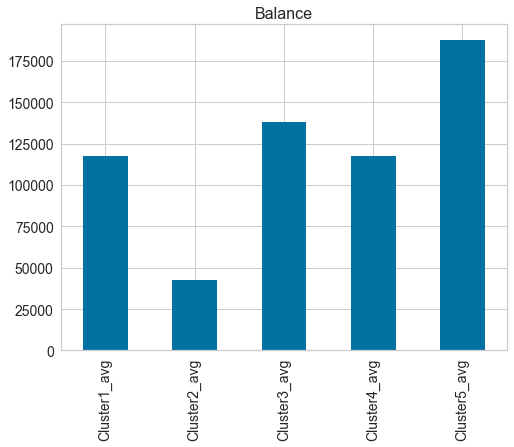

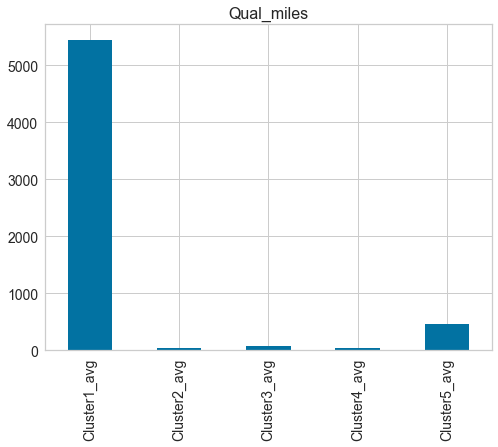

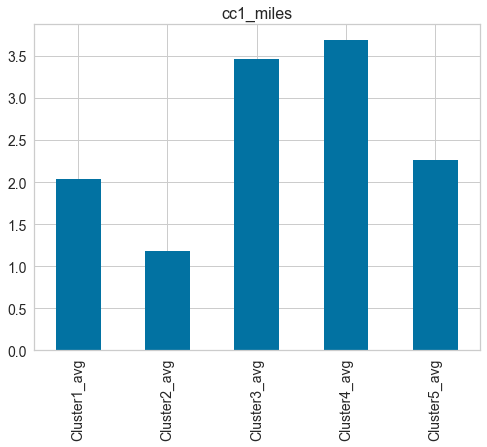

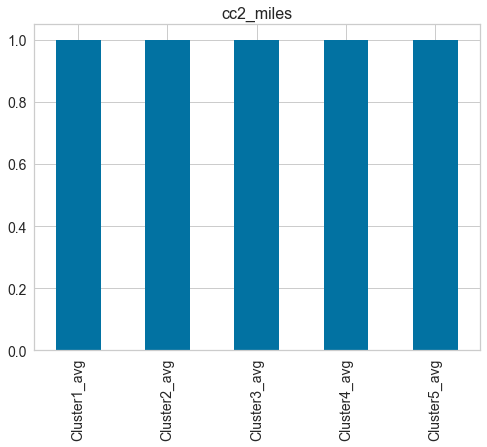

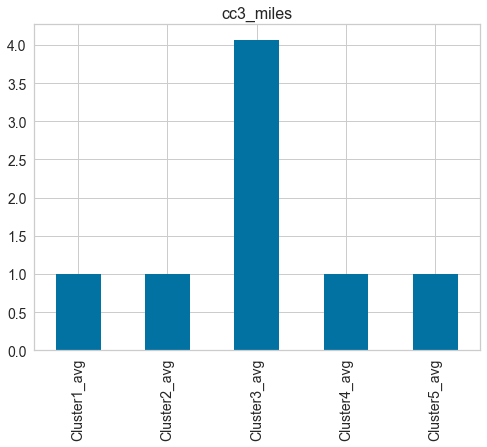

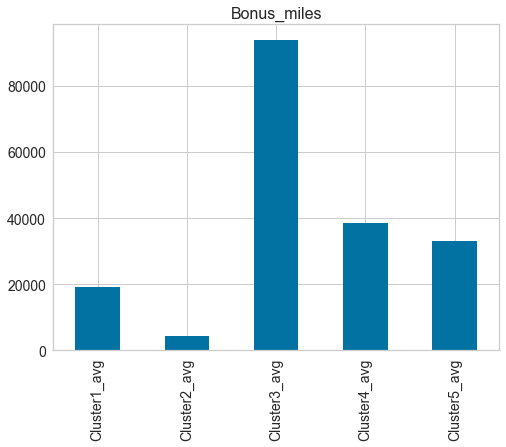

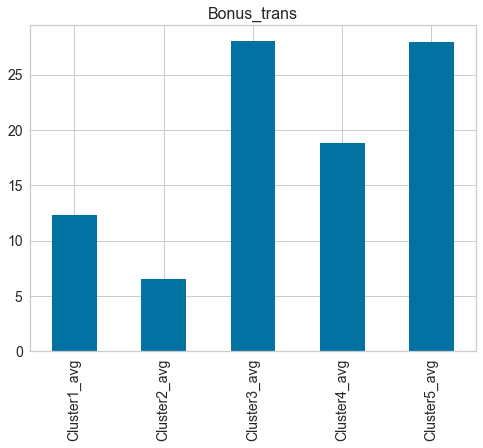

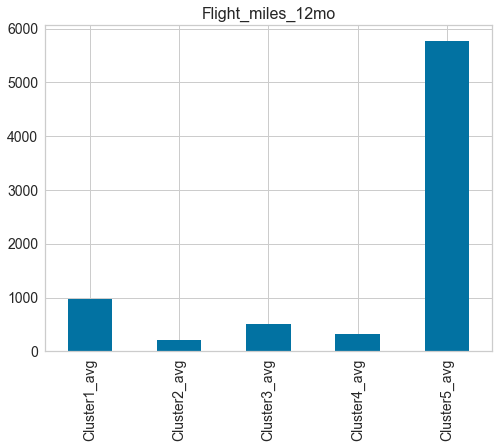

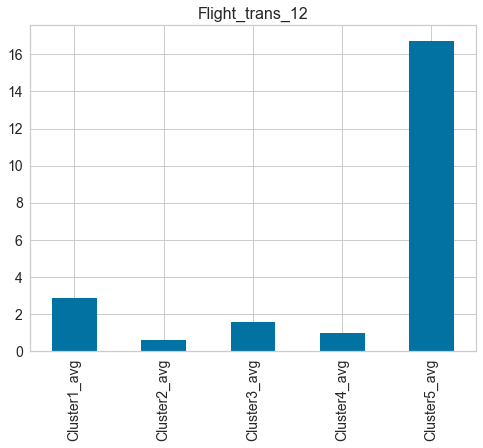

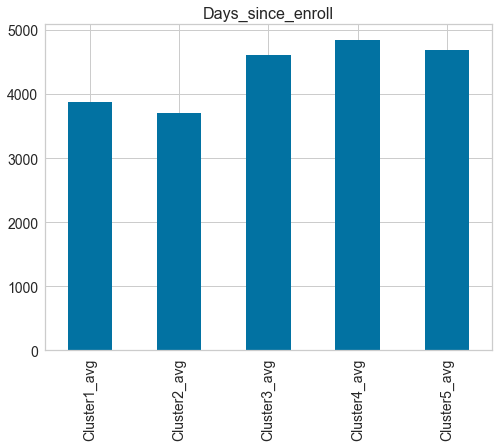

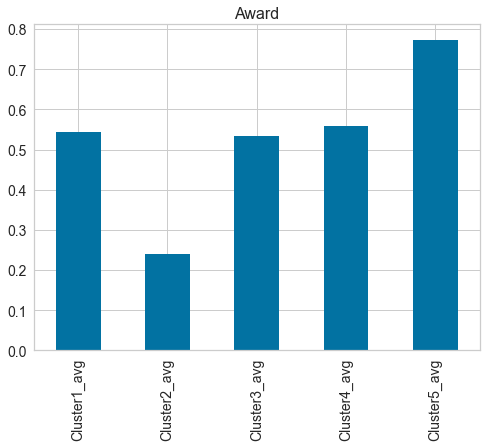

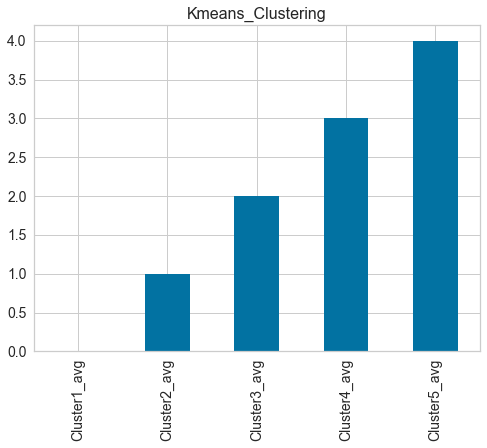

In [86]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

In [88]:
model_=DBSCAN(eps=0.3,min_samples=13)
pred_=model_.fit_predict(dataset1)
pred_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

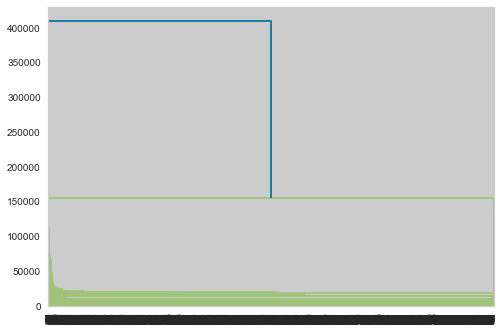

In [90]:
dendrogram=sch.dendrogram(sch.linkage(dataset1,method='single'))

In [91]:
HC=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc=HC.fit_predict(dataset1)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0
